# **`scikit-learn`** Simple Linear Regression

## **`scikit-learn`** Library

**`scikit-learn`**, often referred to as `sklearn`, is a Python library for machine learning. It provides a wide range of tools for various machine learning tasks.

We will use `scikit-learn` to perform simple linear regression.

The process includes the following steps:

1. Load the dataset.
2. Select the predictor variable and the response variable
3. Split the data into a training set and a testing set.
4. Train the simple linear regression model.
5. Make predictions.
6. Visualize the regression line.
7. Evaluate the model.

## **`scikit-learn`** Linear Regression Model

**`sklearn.linear_model.LinearRegression`** is a class within the `sklearn.linear_model` module in the `scikit-learn` library that implements ordinary least squares Linear Regression.

This model aims to fit a linear equation to a dataset by minimizing the residual sum of squares between the observed targets and the predicted values.

### Key aspects of `sklearn.linear_model.LinearRegression`

* **Ordinary Least Squares (OLS):** It finds the best-fitting line by minimizing the sum of the squared differences between the actual and predicted values.
* **Attributes after fitting:**
    * `coef_`: An array representing the coefficients (slopes) assigned to each feature in the linear model.
    * `intercept_`: The independent term in the linear model, also known as the y-intercept.

### Parameters during initialization

* `fit_intercept`: A boolean (default `True`) indicating whether to calculate the intercept for this model. If `False`, no intercept will be used.
* `normalize`: A boolean (default `False`) that, if `True`, normalizes the regressors X before regression. This parameter is deprecated in newer versions of scikit-learn.
* `copy_X`: A boolean (default `True`) that, if `True`, copies X; otherwise, X may be overwritten.

### Methods

* `fit(X, y)`: Trains the model using the training data X (features) and y (target variable).
* `predict(X)`: Makes predictions on new data X using the trained model.
* `score(X, y)`: Returns the coefficient of determination R-squared of the prediction.

## Import Libraries

In [18]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

## Load the Dataset

We will use the Boston Housing Dataset. This dataset provides details on Boston real estate costs such as room counts and prices.

It includes the following columns:
* rooms: average number of rooms per dwelling,
* distance: weighted distances to five Boston employment centers,
* value: median value of homes in $1000.

Based on the number of rooms, we will forecast the value of the house.

In [19]:
# csv file location
url = 'https://github.com/tariqzahratahdi/MachineLearning/raw/refs/heads/main/datasets/boston_house_prices.csv'

# making data frame from csv file
data = pd.read_csv(url)

# show dataframe
data

,rooms,distance,value
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7
3,6.998,6.0622,33.4
4,7.147,6.0622,36.2
...,...,...,...
501,6.593,2.4786,22.4
502,6.120,2.2875,20.6
503,6.976,2.1675,23.9
504,6.794,2.3889,22.0


## Explore the Dataset

We will use a scatter plot to explore the dataset.

<Axes: xlabel='rooms', ylabel='value'>

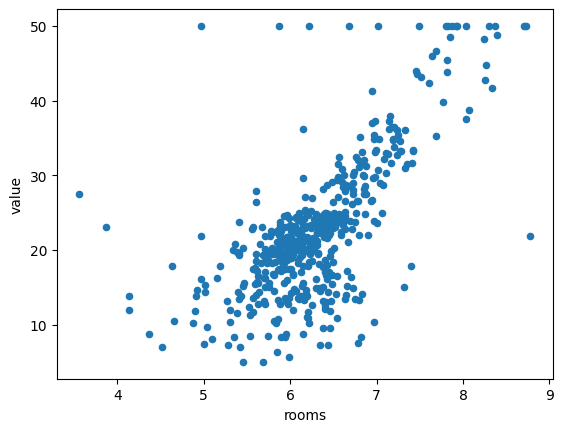

In [20]:
data.plot(kind='scatter', x='rooms', y='value')

## Define Predictor Variable and Response Variable

We will use the number of rooms (`rooms`) as the predictor variable and the house value (`value`) as the reponse variable.

In [21]:
# define the predictor variable and the response variable
X = data[['rooms']]
y = data['value']

## Split the Data

We will split the data into training sets and testing sets.

The `train_test_split()` function in `scikit-learn`'s `model_selection` module is a utility for splitting datasets into training and testing subsets.

In [22]:
# import train_test_split
from sklearn.model_selection import train_test_split

# split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 404
Testing set size: 102


## Create and Train the Model

We will use the `LinearRegression` class within the `sklearn.linear_model` module in the `scikit-learn` library.

The model will calculate the intercept ($b_0$) and the coefficient ($b_1$) of the linear equation.

In [28]:
#import LinearRegression
from sklearn.linear_model import LinearRegression

# create a linear regression model
model = LinearRegression()

# train the model on the training data
model.fit(X_train, y_train)

# print the intercept and coefficient
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")

Intercept: -36.25
Coefficient: 9.35


## Make Predictions

Once the model is trained, we can use it to make predictions on the test data.

In [24]:
# predict house values for the test set
y_pred = model.predict(X_test)

# create a dataframe containing the predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print(predictions.head())

     Actual  Predicted
173    23.6  23.732383
274    32.4  26.929502
491    13.6  19.684568
72     22.8  20.451129
452    16.1  22.619935


## Visualize the Regression Line

A good way to understand the relationship between the predicted and actual data is to visualize it.

We will plot the regression line along with the actual data points.

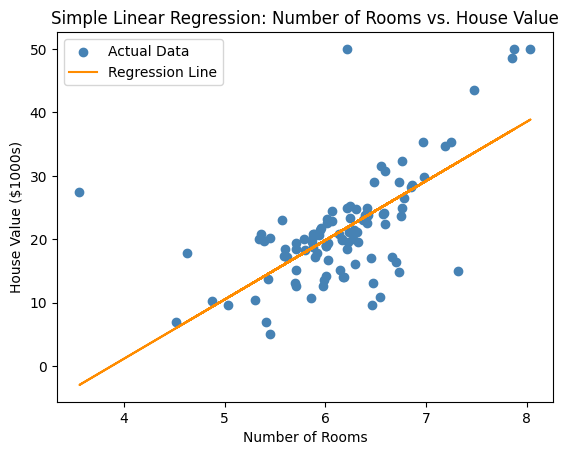

In [25]:
# plot the actual data points
plt.scatter(X_test, y_test, color='steelblue', label='Actual Data')

# plot the regression line
plt.plot(X_test, y_pred, color='darkorange', label='Regression Line')

# add labels and title
plt.xlabel('Number of Rooms')
plt.ylabel('House Value ($1000s)')
plt.title('Simple Linear Regression: Number of Rooms vs. House Value')
plt.legend()
plt.show()

## Evaluate the Model

Finally, we will evaluate the model's performance using the metrics Mean Squared Error (MSE) and R-squared score.


**Mean Squared Error**

The Mean Squared Error is calculated as the average of the squared differences between the predicted and actual values.

A lower MSE indicates a better fit of the model to the data.

Scikit-learn's `mean_squared_error` function calculates MSE.

**R-squared**

The R-squared (coefficient of determination) score in `scikit-learn` is a metric used to evaluate the performance of regression models.

It quantifies the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

A higher R-squared value (closer to 1) means more of the data points are close to the regression line, while a lower value (closer to 0) indicates a poorer fit.

Scikit-learn's `r2_score()` function calculates R-squared as:

$$R^2 = \frac {\text{Residual Sum of Squares (SSE)}}{\text{Total Sum of Squares (SST)}}$$

where
* SSE (Residual Sum of Squares): is the sum of the squared differences between the actual target values and the predicted target values.
* SST (Total Sum of Squares): is the sum of the squared differences between the actual target values and the mean of the actual target values.

In [26]:
# import evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

# calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")

Mean Squared Error: 46.14
R-squared score: 0.37
